In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# 數據加載和轉換
from torch.utils.data import DataLoader, Dataset, random_split, TensorDataset
import torchvision
from torchvision import datasets, transforms

# 模型層、激活函數和損失函數
from torch.nn import functional as F
from torch.nn.modules import (
    dropout, loss, padding, pooling, activation,
    batchnorm, normalization, conv, linear
)

# 優化器和學習率調整
from torch.optim import lr_scheduler, Adam, SGD
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# 模型存儲和加載
# (注意: 這裡只是語法提示, 不是實際的調用代碼)
# torch.save(...)
# torch.load(...)

# 裝置選擇 (例如在 CPU 和 GPU 之間切換)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 其他工具
from torch.autograd import Variable
from torch.nn.utils import clip_grad_norm_

from PIL import Image
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [ ]:
pip install transformers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
train = pd.read_csv('/content/drive/My Drive/train_shopee.csv')

Mounted at /content/drive


In [ ]:
# train = pd.read_csv('/Users/yankesswang/Downloads/shopee-product-matching/train.csv')
# test = pd.read_csv('/Users/yankesswang/Downloads/shopee-product-matching/test.csv')

In [ ]:
train.head()

posting_id                                 image       image_phash  \
0   train_129225211  0000a68812bc7e98c42888dfb1c07da0.jpg  94974f937d4c2433   
1  train_3386243561  00039780dfc94d01db8676fe789ecd05.jpg  af3f9460c2838f0f   
2  train_2288590299  000a190fdd715a2a36faed16e2c65df7.jpg  b94cb00ed3e50f78   
3  train_2406599165  00117e4fc239b1b641ff08340b429633.jpg  8514fc58eafea283   
4  train_3369186413  00136d1cf4edede0203f32f05f660588.jpg  a6f319f924ad708c   

                                               title  label_group  
0                          Paper Bag Victoria Secret    249114794  
1  Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...   2937985045  
2        Maling TTS Canned Pork Luncheon Meat 397 gr   2395904891  
3  Daster Batik Lengan pendek - Motif Acak / Camp...   4093212188  
4                  Nescafe \xc3\x89clair Latte 220ml   3648931069

In [ ]:
import os
path = '/content/drive/My Drive/train_images/'

train['image'] = path + train['image']

In [ ]:
train.head()

posting_id                                              image  \
0   train_129225211  /content/drive/My Drive/train_images/0000a6881...   
1  train_3386243561  /content/drive/My Drive/train_images/00039780d...   
2  train_2288590299  /content/drive/My Drive/train_images/000a190fd...   
3  train_2406599165  /content/drive/My Drive/train_images/00117e4fc...   
4  train_3369186413  /content/drive/My Drive/train_images/00136d1cf...   

        image_phash                                              title  \
0  94974f937d4c2433                          Paper Bag Victoria Secret   
1  af3f9460c2838f0f  Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...   
2  b94cb00ed3e50f78        Maling TTS Canned Pork Luncheon Meat 397 gr   
3  8514fc58eafea283  Daster Batik Lengan pendek - Motif Acak / Camp...   
4  a6f319f924ad708c                  Nescafe \xc3\x89clair Latte 220ml   

   label_group  
0    249114794  
1   2937985045  
2   2395904891  
3   4093212188  
4   3648931069

In [ ]:
len(train)

34250

In [ ]:
pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 12.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import sys
# sys.path.append('../input/timm-pytorch-image-models/pytorch-image-models-master')
import os
import sys
import time
import cv2
import PIL.Image
import random
from sklearn.metrics import accuracy_score
from tqdm.notebook import tqdm
import torch
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR
import albumentations
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import gc
from sklearn.metrics import roc_auc_score
%matplotlib inline
import seaborn as sns
from pylab import rcParams
import timm
from warnings import filterwarnings
from sklearn.preprocessing import LabelEncoder
import math
import glob
from sklearn.model_selection import StratifiedKFold, GroupKFold
filterwarnings("ignore")

In [ ]:
gkf = GroupKFold(n_splits=5)
train['fold'] = -1
for fold, (train_idx, valid_idx) in enumerate(gkf.split(train, None, train.label_group)):
    train.loc[valid_idx, 'fold'] = fold

In [ ]:
train.head()

posting_id                                              image  \
0   train_129225211  /content/drive/My Drive/train_images/0000a6881...   
1  train_3386243561  /content/drive/My Drive/train_images/00039780d...   
2  train_2288590299  /content/drive/My Drive/train_images/000a190fd...   
3  train_2406599165  /content/drive/My Drive/train_images/00117e4fc...   
4  train_3369186413  /content/drive/My Drive/train_images/00136d1cf...   

        image_phash                                              title  \
0  94974f937d4c2433                          Paper Bag Victoria Secret   
1  af3f9460c2838f0f  Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...   
2  b94cb00ed3e50f78        Maling TTS Canned Pork Luncheon Meat 397 gr   
3  8514fc58eafea283  Daster Batik Lengan pendek - Motif Acak / Camp...   
4  a6f319f924ad708c                  Nescafe \xc3\x89clair Latte 220ml   

   label_group  fold  
0    249114794     3  
1   2937985045     3  
2   2395904891     4  
3   4093212188     3  
4   3648931069     1

EDA

In [ ]:
# function to display multiple images

def display_multiple_img(images_paths, rows, cols,title):

    figure, ax = plt.subplots(nrows=rows,ncols=cols,figsize=(16,8))
    plt.suptitle(title, fontsize=20)
    for ind,image_path in enumerate(images_paths):
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        try:
            ax.ravel()[ind].imshow(image)
            ax.ravel()[ind].set_axis_off()
        except:
            continue;
    plt.tight_layout()
    plt.show()

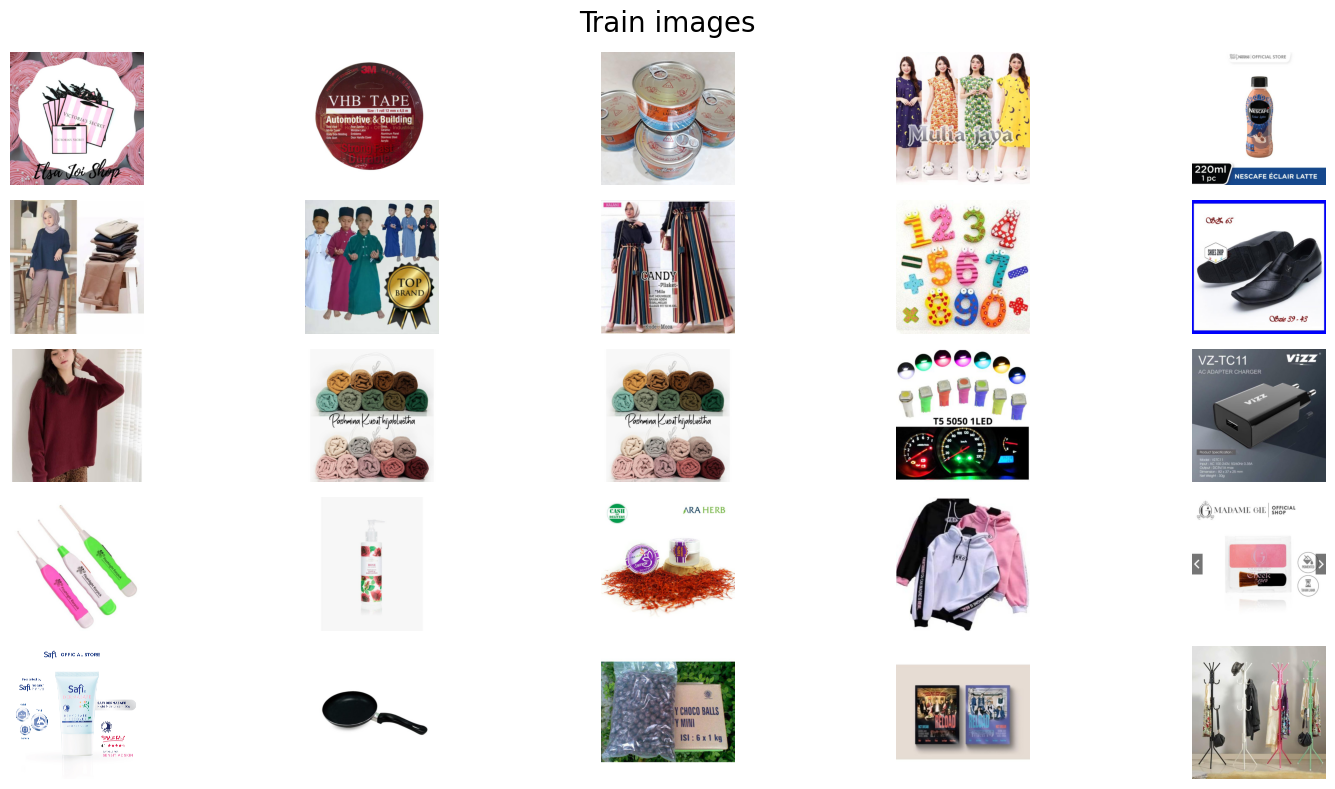

In [ ]:
display_multiple_img(train['image'][0:25], 5, 5,"Train images")

In [ ]:
train['label_group'].nunique()

11014

In [ ]:
train_labels_count = train['label_group'].value_counts()

# getting count for most frequent and least frequent label groups
most_freq = train_labels_count[train_labels_count == train_labels_count.max()]
less_freq = train_labels_count[train_labels_count == train_labels_count.min()]

# getting most frequent and least frequent label groups
m_label = np.unique(train['label_group'][train['label_group'].isin(most_freq.index)].values)
l_label = np.unique(train['label_group'][train['label_group'].isin(less_freq.index)].values)

print("Most frequent label group: ", m_label)
print("Less frequent label group: ", l_label)

Most frequent label group:  [ 159351600  562358068  994676122 1141798720 1163569239 3113678103
 3627744656]
Less frequent label group:  [    297977     801176     887886 ... 4292154092 4292939171 4293276364]


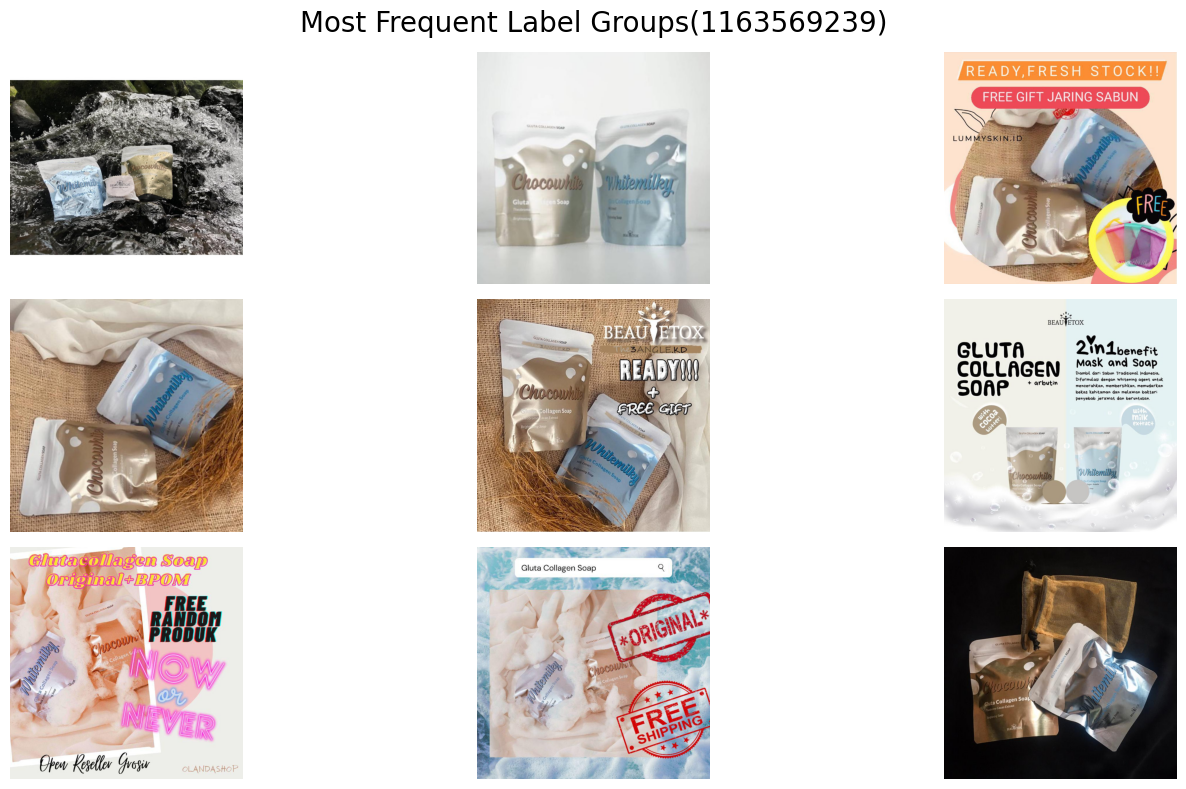

In [ ]:
# Assuming 'train' is your DataFrame
desired_rows = train[train['label_group'] == 159351600]
# print(desired_rows)
display_multiple_img(desired_rows['image'][0:9], 3, 3,"Most Frequent Label Groups(1163569239)")

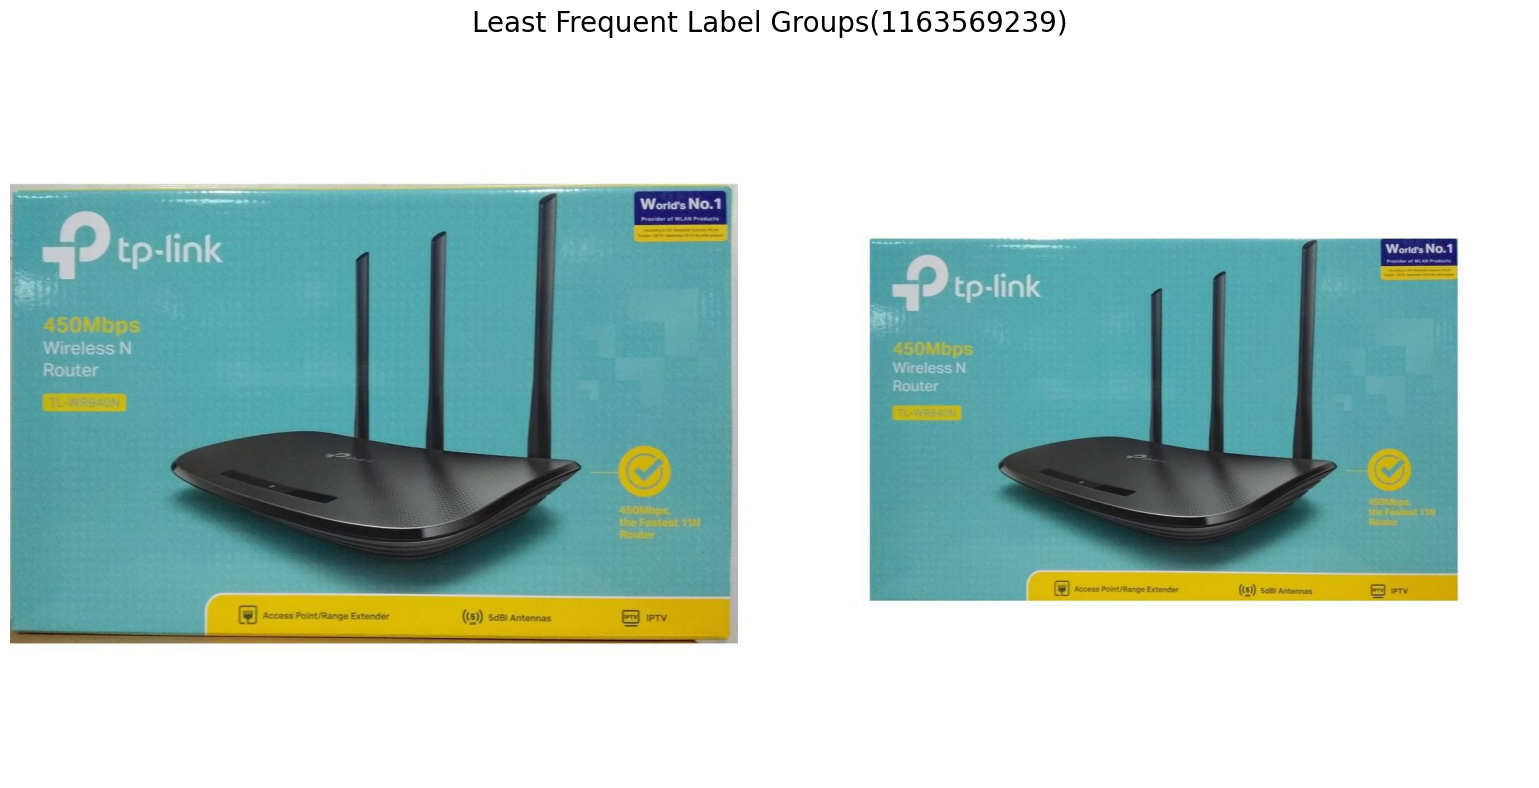

In [ ]:
# Assuming 'train' is your DataFrame
desired_rows = train[train['label_group'] == 887886]
# print(desired_rows)
display_multiple_img(desired_rows['image'][0:2], 1, 2,"Least Frequent Label Groups(1163569239)")

In [ ]:
title = train['title'].value_counts().sort_values(ascending=False).reset_index()
title.columns = ['title','count']
title

title  count
0         Koko syubbanul muslimin koko azzahir koko baju      9
1      Baju Koko Pria Gus Azmi Syubbanul Muslimin Kom...      8
2                                         Viva Air Mawar      6
3                   Monde Boromon Cookies 1 tahun+ 120gr      6
4      100 Pcs Ikat Rambut Karet Polos Elastis Gaya K...      6
...                                                  ...    ...
33112  HelloMaster - 665 - Tas Handbag Wanita KOREA F...      1
33113  Holder Hp ,  Mobil & Rumah Magic Suction 360 D...      1
33114                                     KARDUS PACKING      1
33115                    SANDAL WEDGES SPON KN 02 SILANG      1
33116  FLEX TAPE PELAPIS BOCOR / ISOLASI AJAIB / ANTI...      1

[33117 rows x 2 columns]

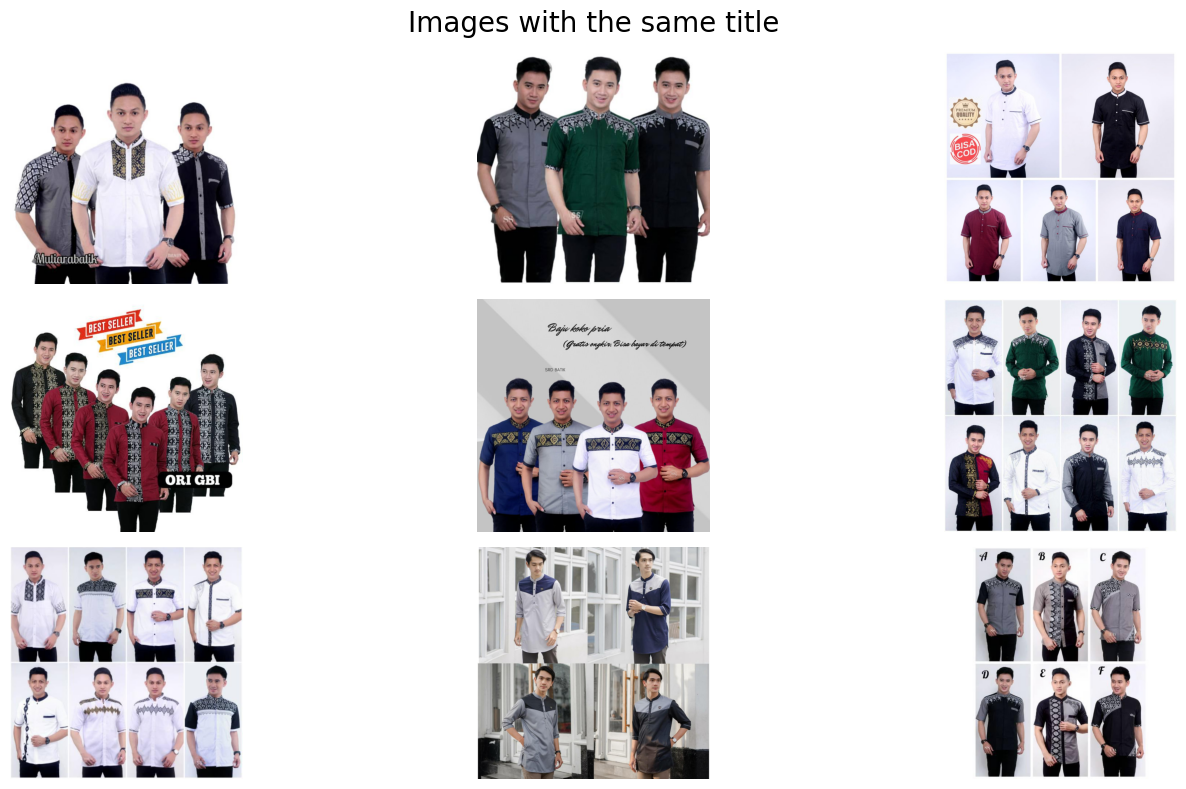

In [ ]:
desired_rows = train[train['title'] == 'Koko syubbanul muslimin koko azzahir koko baju']
# print(desired_rows)
display_multiple_img(desired_rows['image'][0:9], 3, 3,"Images with the same title")

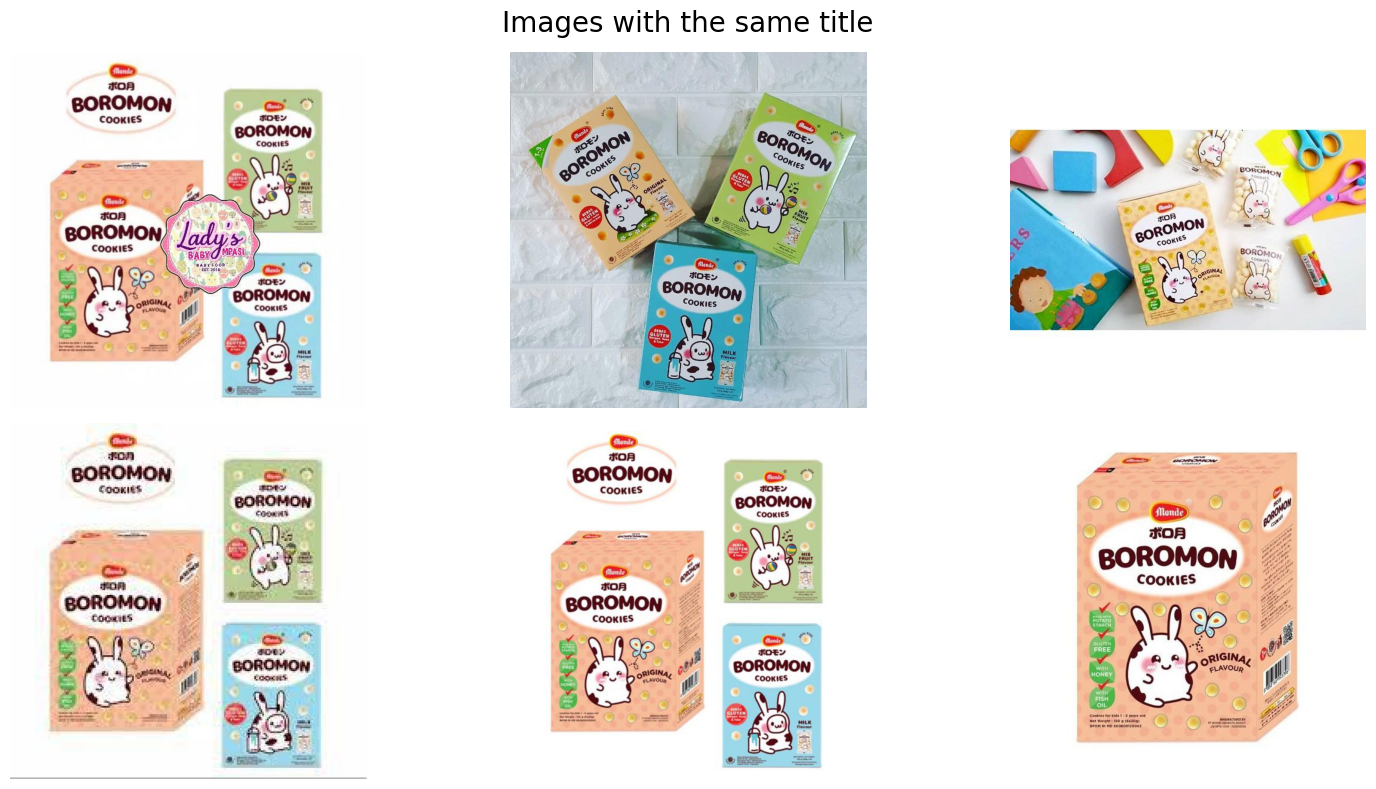

In [ ]:
img_title = "Monde Boromon Cookies 1 tahun+ 120gr"
desired_rows = train[train['title'] == img_title]
# print(desired_rows)
display_multiple_img(desired_rows['image'][0:6], 2, 3,"Images with the same title")

In [ ]:
le = LabelEncoder()
train.label_group = le.fit_transform(train.label_group)

In [ ]:
image_size = 512
batch_size = 16
n_worker = 4
init_lr = 3e-4
n_epochs = 6 # from my experiments, use > 25 when margin = 0.5
fold_id = 0
holdout_id = 0
valid_every = 5
save_after = 10
margin = 0.5 # 0 for faster convergence, larger may be beneficial
search_space = np.arange(40, 100, 10) # in my experiments, thresholds should be between 40 - 90 (/100) for cosine similarity
use_amp = False # todo: figure how to work with pytorch native amp
debug = True # set this to False to train in full

In [ ]:
transforms_train = albumentations.Compose([
    albumentations.Resize(image_size, image_size),
    albumentations.HorizontalFlip(p=0.5),
    albumentations.RandomBrightnessContrast(p=0.5, brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2)),
    albumentations.HueSaturationValue(p=0.5, hue_shift_limit=0.2, sat_shift_limit=0.2, val_shift_limit=0.2),
    albumentations.ShiftScaleRotate(p=0.5, shift_limit=0.0625, scale_limit=0.2, rotate_limit=20),
    albumentations.CoarseDropout(p=0.5),
    albumentations.Normalize()
])

transforms_valid = albumentations.Compose([
    albumentations.Resize(image_size, image_size),
    albumentations.Normalize()
])

In [ ]:
label_group_distribution = train['label_group'].value_counts()
label_group_distribution.head()

2606    51
3041    51
2994    51
412     51
1445    51
Name: label_group, dtype: int64

In [ ]:
# class SHOPEEDataset(Dataset):
#     def __init__(self, img_path, transform):
#         self.img_path = img_path
#         self.transform = transform

#     def __getitem__(self, index):
#         img = Image.open(self.img_path[index]).convert('RGB')
#         img = self.transform(img)
#         label = self.labels[index]
#         return img, label
#     def __len__(self):
#         return len(self.img_path)

In [ ]:
class SHOPEEDataset(Dataset):
    def __init__(self, df, mode, transform=None):

        self.df = df.reset_index(drop=True)
        self.mode = mode
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):
        row = self.df.loc[index]
        img = cv2.imread(row.image)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        if self.transform is not None:
            res = self.transform(image=img)
            img = res['image']

        img = img.astype(np.float32)
        img = img.transpose(2,0,1)

        if self.mode == 'test':
            return torch.tensor(img).float()
        else:
            return torch.tensor(img).float(), torch.tensor(row.label_group).float()

In [ ]:
imagedataset = SHOPEEDataset(train,'train', transform = transforms_train)
imageloader = torch.utils.data.DataLoader(
    imagedataset,
    batch_size=batch_size, shuffle=False, num_workers=n_worker
)

In [ ]:
# # dataset = SHOPEEDataset(train, 'train', transform = transforms_train)
# plt.rcParams['figure.figsize'] = (15, 5)
# for i in range(2):
#     f, axarr = plt.subplots(1, 5)
#     for p in range(5):
#         idx = i*5 + p
#         img, label = imagedataset[idx]
#         axarr[p].imshow(img.permute(1, 2, 0))  # 調整維度順序以用於顯示
#         axarr[p].set_title(label)

# 圖片處理

In [ ]:
class ArcModule(nn.Module):
    def __init__(self, in_features, out_features, s = 10, m = margin):
        super().__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.s = s
        self.m = m
        self.weight = nn.Parameter(torch.FloatTensor(out_features, in_features))
        nn.init.xavier_normal_(self.weight)

        self.cos_m = math.cos(m)
        self.sin_m = math.sin(m)
        self.th = torch.tensor(math.cos(math.pi - m))
        self.mm = torch.tensor(math.sin(math.pi - m) * m)

    def forward(self, inputs, labels):
        cos_th = F.linear(inputs, F.normalize(self.weight))
        cos_th = cos_th.clamp(-1, 1)
        sin_th = torch.sqrt(1.0 - torch.pow(cos_th, 2))
        cos_th_m = cos_th * self.cos_m - sin_th * self.sin_m
        # print(type(cos_th), type(self.th), type(cos_th_m), type(self.mm))
        cos_th_m = torch.where(cos_th > self.th, cos_th_m, cos_th - self.mm)

        cond_v = cos_th - self.th
        cond = cond_v <= 0
        cos_th_m[cond] = (cos_th - self.mm)[cond]

        if labels.dim() == 1:
            labels = labels.unsqueeze(-1)
        onehot = torch.zeros(cos_th.size()).cuda()
        labels = labels.type(torch.LongTensor).cuda()
        onehot.scatter_(1, labels, 1.0)
        outputs = onehot * cos_th_m + (1.0 - onehot) * cos_th
        outputs = outputs * self.s
        return outputs

In [ ]:
class SHOPEEDenseNet(nn.Module):

    def __init__(self, channel_size, out_feature):
        super(SHOPEEDenseNet, self).__init__()
        self.model = timm.create_model('densenet121', pretrained=True)
        self.channel_size = channel_size
        self.out_feature = out_feature
        self.in_features = self.model.classifier.in_features
        self.margin = ArcModule(in_features=self.channel_size, out_features = self.out_feature)
        self.bn1 = nn.BatchNorm2d(self.in_features)
        self.dropout = nn.Dropout2d(0.5, inplace=True)
        self.fc1 = nn.Linear(self.in_features * 16 * 16 , self.channel_size)
        self.bn2 = nn.BatchNorm1d(self.channel_size)

    def forward(self, x, labels=None):
        features = self.model.features(x)
        features = self.bn1(features)
        features = self.dropout(features)
        features = features.view(features.size(0), -1)
        features = self.fc1(features)
        features = self.bn2(features)
        features = F.normalize(features)
        if labels:
            return self.margin(features, labels)
        return features

In [ ]:
model = SHOPEEDenseNet(512, train.label_group.nunique())
model.to(device);

In [ ]:
DEVICE = 'cuda'
def get_image_embeddings():

    imgmodel = SHOPEEDenseNet(512, train.label_group.nunique())
    imgmodel = imgmodel.to(DEVICE)

    bar = tqdm(imageloader)
    imagefeat = []
    with torch.no_grad():
        for idx, (data, target) in enumerate(bar):
            data = data.to(DEVICE)
            feat = imgmodel(data)
            feat = feat.reshape(feat.shape[0], feat.shape[1])
            feat = feat.data.cpu().numpy()

            imagefeat.append(feat)
    return imagefeat
image_embeddings = get_image_embeddings()

  0%|          | 0/2141 [00:00<?, ?it/s]

In [ ]:
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 395, done.
remote: Counting objects: 100% (126/126), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 395 (delta 92), reused 53 (delta 51), pack-reused 269
Receiving objects: 100% (395/395), 108.50 KiB | 1.19 MiB/s, done.
Resolving deltas: 100% (194/194), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.7 MB/s eta 0:00:00
***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla T4!
We will now install RAPIDS cuDF, cuML, and cuGraph via pip! 
Please stand by, should be quick...
***********************************************************************

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.6/502.6 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 GB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!python rapidsai-csp-utils/colab/install_rapids.py stable
import os
os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'
os.environ['CONDA_PREFIX'] = '/usr/local'

In [ ]:
import cudf
import cuml
import os
import numpy as np
import pandas as pd

In [ ]:
import gc
# import cudf
import cuml
import cupy
from cuml.feature_extraction.text import TfidfVectorizer
from cuml.neighbors import NearestNeighbors

In [ ]:
from sklearn.neighbors import NearestNeighbors

def get_image_predictions(df, embeddings,threshold = 0.0):

    if len(df) > 3:
        KNN = 50
    else :
        KNN = 3
    embeddings_concatenated = np.concatenate(embeddings, axis=0)

    # Initialize NearestNeighbors with cosine similarity
    model = NearestNeighbors(n_neighbors=KNN, metric='cosine')
    model.fit(embeddings_concatenated)
    distances, indices = model.kneighbors(embeddings_concatenated)
    predictions = []
    for k in tqdm(range(embeddings.shape[0])):
        idx = np.where(distances[k,] < threshold)[0]
        ids = indices[k,idx]
        posting_ids = df['posting_id'].iloc[ids].values
        predictions.append(posting_ids)

    del model, distances, indices
    gc.collect()
    return predictions

In [ ]:
image_predictions = get_image_predictions(train, image_embeddings, threshold = 0.36)

In [ ]:
from sklearn.preprocessing import normalize

# l2 norm to kill all the sim in 0-1
imagefeat = np.vstack(imagefeat)
imagefeat = normalize(imagefeat) # 对每一个嵌入向量归一化 axis=1:normalize each sample

In [ ]:
imagefeat = torch.from_numpy(imagefeat)
imagefeat = imagefeat.cuda()

In [ ]:
imagefeat

tensor([[ 0.0570, -0.0402, -0.0149,  ..., -0.0219,  0.0321,  0.0311],
        [-0.0854,  0.0225,  0.0394,  ..., -0.0725, -0.0574, -0.0601],
        [ 0.0594, -0.0782, -0.0520,  ...,  0.1006, -0.0325,  0.0938],
        ...,
        [ 0.0032,  0.0549,  0.0123,  ...,  0.0027,  0.0121,  0.0402],
        [ 0.0069,  0.0219,  0.0627,  ...,  0.0185, -0.0609, -0.0063],
        [ 0.0346,  0.0260, -0.0219,  ...,  0.0038, -0.0039,  0.0246]],
       device='cuda:0')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
model = TfidfVectorizer(stop_words=None, binary=True, max_features=20250)
text_embeddings = model.fit_transform(train.title).toarray()
print('text embeddings shape',text_embeddings.shape)

text_embeddings = torch.from_numpy(text_embeddings)
text_embeddings = text_embeddings.cuda()
preds = []
CHUNK = 1024*4

print('Finding similar titles...')
CTS = len(train)//CHUNK
if len(train)%CHUNK!=0: CTS += 1
CTS_index = 0
for j in range( CTS ):

    a = j*CHUNK
    b = (j+1)*CHUNK
    b = min(b,len(train))
    print('chunk',a,'to',b)

    # COSINE SIMILARITY DISTANCE
    # cts = np.dot( text_embeddings, text_embeddings[a:b].T).T
    cts = torch.matmul(text_embeddings, text_embeddings[a:b].T).T
    cts = cts.data.cpu().numpy()
    print(cts.shape)
    for k in range(b-a):
        # IDX = np.where(cts[k,]>0.7)[0]
        IDX = np.where(cts[k,]>0.7)[0]
        o = train.iloc[IDX].posting_id.values
        preds.append(o)
        CTS_index += 1
# del model, text_embeddings

train['oof_text'] = preds
# 仅考虑 TFIDF 的成绩
if COMPUTE_CV:
    train['f1'] = train.apply(getMetric('oof_text'),axis=1)
    print('CV score for baseline =',train.f1.mean())

text embeddings shape (34250, 20250)
Finding similar titles...
chunk 0 to 4096
(4096, 34250)
chunk 4096 to 8192
(4096, 34250)
chunk 8192 to 12288
(4096, 34250)
chunk 12288 to 16384
(4096, 34250)
chunk 16384 to 20480
(4096, 34250)
chunk 20480 to 24576
(4096, 34250)
chunk 24576 to 28672
(4096, 34250)
chunk 28672 to 32768
(4096, 34250)
chunk 32768 to 34250
(1482, 34250)
CV score for baseline = 0.6220834972446548


In [ ]:
preds = []
CHUNK = 1024*4


print('Finding similar images...')
CTS = len(imagefeat)//CHUNK
if len(imagefeat)%CHUNK!=0: CTS += 1
for j in range( CTS ):

    a = j*CHUNK
    b = (j+1)*CHUNK
    b = min(b, len(imagefeat))
    print('chunk',a,'to',b) # 对a到b的每一个数据计算它到其他数据的距离
    cts = torch.matmul(text_embeddings, text_embeddings[a:b].T).T
    cts = cts.data.cpu().numpy()
    distances = torch.matmul(imagefeat, imagefeat[a:b].T).T # 点乘计算余弦相似度，注意最后的转置
    distances = distances.data.cpu().numpy()
    # distances = np.dot(imagefeat[a:b,], imagefeat.T)

    for k in range(b-a):
        # IDX = cupy.where(distances[k,]>0.95)[0]
        similarity_score = (distances[k] / 0.84) ** 6 + (cts[k] / 0.84) ** 6
        IDX = np.where(similarity_score>1)[0][:] # 注意这个“距离”是余弦，角度越小余弦值越大，所以是越大越相似
        o = train.iloc[IDX].posting_id.values
#       o = train.iloc[cupy.asnumpy(IDX)].posting_id.values
        preds.append(o)

del imagefeat, imgmodel,text_embeddings

Finding similar images...
chunk 0 to 4096
chunk 4096 to 8192
chunk 8192 to 12288
chunk 12288 to 16384
chunk 16384 to 20480
chunk 20480 to 24576
chunk 24576 to 28672
chunk 28672 to 32768
chunk 32768 to 34250


In [ ]:
def getMetric(col):
    def f1score(row):
        # 查找两个数组的交集 T and P
        n = len( np.intersect1d(row.target,row[col]) )
        # row.target实际P, row[col]表现P,计算公式见上一个cell
        return 2*n / (len(row.target)+len(row[col]))
    return f1score

In [ ]:
def combine_for_sub(row):
    x = np.concatenate([row.oof_text,row.oof_cnn, row.oof_hash])
    return ' '.join( np.unique(x) )

def combine_for_cv(row):
    x = np.concatenate([row.oof_text,row.oof_cnn, row.oof_hash])
    return np.unique(x)

In [ ]:
tmp = train.groupby('image_phash').posting_id.agg('unique').to_dict()
train['oof_hash'] = train.image_phash.map(tmp)

In [ ]:
train.head()

posting_id                                              image  \
0   train_129225211  /content/drive/My Drive/train_images/0000a6881...   
1  train_3386243561  /content/drive/My Drive/train_images/00039780d...   
2  train_2288590299  /content/drive/My Drive/train_images/000a190fd...   
3  train_2406599165  /content/drive/My Drive/train_images/00117e4fc...   
4  train_3369186413  /content/drive/My Drive/train_images/00136d1cf...   

        image_phash                                              title  \
0  94974f937d4c2433                          Paper Bag Victoria Secret   
1  af3f9460c2838f0f  Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...   
2  b94cb00ed3e50f78        Maling TTS Canned Pork Luncheon Meat 397 gr   
3  8514fc58eafea283  Daster Batik Lengan pendek - Motif Acak / Camp...   
4  a6f319f924ad708c                  Nescafe \xc3\x89clair Latte 220ml   

   label_group  fold                                            oof_cnn  \
0          666     3                [train_129225211, train_2278313361]   
1         7572     3                                 [train_3386243561]   
2         6172     4                                 [train_2288590299]   
3        10509     3  [train_2406599165, train_3576714541, train_174...   
4         9425     1                                 [train_3369186413]   

                                 target        f1  \
0   [train_129225211, train_2278313361]  1.000000   
1  [train_3386243561, train_3423213080]  0.666667   
2  [train_2288590299, train_3803689425]  1.000000   
3  [train_2406599165, train_3342059966]  0.285714   
4   [train_3369186413, train_921438619]  0.666667   

                                            oof_text            oof_hash  
0                [train_129225211, train_2278313361]   [train_129225211]  
1                                 [train_3386243561]  [train_3386243561]  
2               [train_2288590299, train_3803689425]  [train_2288590299]  
3  [train_2406599165, train_3576714541, train_150...  [train_2406599165]  
4                                 [train_3369186413]  [train_3369186413]

In [ ]:
# train['oof_cnn'] = preds
# 仅考虑 resnet 的成绩
COMPUTE_CV = True
# if COMPUTE_CV:
#     tmp = train.groupby('label_group').posting_id.agg('unique').to_dict()
#     train['target'] = train.label_group.map(tmp)
#     train['f1'] = train.apply(getMetric('oof_cnn'),axis=1)
#     print('CV score for baseline =',train.f1.mean())
if COMPUTE_CV:
    tmp = train.groupby('label_group').posting_id.agg('unique').to_dict()
    train['target'] = train.label_group.map(tmp)
    train['oof'] = train.apply(combine_for_cv,axis=1)
    train['f1'] = train.apply(getMetric('oof'),axis=1)
    print('CV Score =', train.f1.mean() )

CV Score = 0.6792669418732225


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
test = pd.read_csv('/content/drive/My Drive/test_shopee.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
test.head()

posting_id                                              image  \
0  test_2255846744  /content/drive/My Drive/test_images/0006c8e546...   
1  test_3588702337  /content/drive/My Drive/test_images/0007585c4d...   
2  test_4015706929  /content/drive/My Drive/test_images/0008377d36...   

        image_phash                                              title  
0  ecc292392dc7687a  Edufuntoys - CHARACTER PHONE ada lampu dan mus...  
1  e9968f60d2699e2c  (Beli 1 Free Spatula) Masker Komedo | Blackhea...  
2  ba81c17e3581cabe   READY Lemonilo Mie instant sehat kuah dan goreng

In [ ]:
import os
path = '/content/drive/My Drive/test_images/'

test['image'] = path + test['image']

In [ ]:
model = TfidfVectorizer(stop_words=None, binary=True, max_features=20250)
text_embeddings = model.fit_transform(test.title).toarray()
print('text embeddings shape',text_embeddings.shape)

text_embeddings = torch.from_numpy(text_embeddings)
text_embeddings = text_embeddings.cuda()

text embeddings shape (3, 28)


In [ ]:
imagedataset = SHOPEEDataset(test,'test', transform = transforms_train)
imageloader = torch.utils.data.DataLoader(
    imagedataset,
    batch_size=batch_size, shuffle=False, num_workers=n_worker
)

In [ ]:
DEVICE = 'cuda'

imgmodel = SHOPEEDenseNet(512, train.label_group.nunique())
imgmodel = imgmodel.to(DEVICE)

bar = tqdm(imageloader)
imagefeat = []
with torch.no_grad():
    for idx, (data) in enumerate(bar):
        data = data.to(DEVICE)
        feat = imgmodel(data)
        feat = feat.reshape(feat.shape[0], feat.shape[1])
        feat = feat.data.cpu().numpy()

        imagefeat.append(feat)

  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
imagefeat = np.vstack(imagefeat)
imagefeat = normalize(imagefeat) # 对每一个嵌入向量归一化 axis=1:normalize each sample
imagefeat = torch.from_numpy(imagefeat)
imagefeat = imagefeat.cuda()

In [ ]:
preds = []
CHUNK = 1024*4


print('Finding similar images...')
CTS = len(imagefeat)//CHUNK
if len(imagefeat)%CHUNK!=0: CTS += 1
for j in range( CTS ):

    a = j*CHUNK
    b = (j+1)*CHUNK
    b = min(b, len(imagefeat))
    print('chunk',a,'to',b) # 对a到b的每一个数据计算它到其他数据的距离
    cts = torch.matmul(text_embeddings, text_embeddings[a:b].T).T
    cts = cts.data.cpu().numpy()
    distances = torch.matmul(imagefeat, imagefeat[a:b].T).T # 点乘计算余弦相似度，注意最后的转置
    distances = distances.data.cpu().numpy()
    # distances = np.dot(imagefeat[a:b,], imagefeat.T)

    for k in range(b-a):
        # IDX = cupy.where(distances[k,]>0.95)[0]
        similarity_score = (distances[k] / 0.84) ** 6 + (cts[k] / 0.84) ** 6
        IDX = np.where(similarity_score>1)[0][:] # 注意这个“距离”是余弦，角度越小余弦值越大，所以是越大越相似
        o = train.iloc[IDX].posting_id.values
#       o = train.iloc[cupy.asnumpy(IDX)].posting_id.values
        preds.append(o)

del imagefeat, imgmodel,text_embeddings

Finding similar images...
chunk 0 to 3


In [ ]:
test['oof_cnn'] = preds
test

posting_id                                              image  \
0  test_2255846744  /content/drive/My Drive/test_images/0006c8e546...   
1  test_3588702337  /content/drive/My Drive/test_images/0007585c4d...   
2  test_4015706929  /content/drive/My Drive/test_images/0008377d36...   

        image_phash                                              title  \
0  ecc292392dc7687a  Edufuntoys - CHARACTER PHONE ada lampu dan mus...   
1  e9968f60d2699e2c  (Beli 1 Free Spatula) Masker Komedo | Blackhea...   
2  ba81c17e3581cabe   READY Lemonilo Mie instant sehat kuah dan goreng   

              oof_cnn  
0   [train_129225211]  
1  [train_3386243561]  
2  [train_2288590299]

In [ ]:
def train_func(train_loader):
    model.train()
    bar = tqdm(train_loader)
    if use_amp:
        scaler = torch.cuda.amp.GradScaler()
    losses = []
    for batch_idx, (images, targets) in enumerate(bar):

        images, targets = images.to(device), targets.to(device).long()

        if debug and batch_idx == 100:
            print('Debug Mode. Only train on first 100 batches.')
            break

        if use_amp:
            with torch.cuda.amp.autocast():
                logits = model(images, targets)
                loss = criterion(logits, targets)
            scaler.scale(loss).backward()
            if ((batch_idx + 1) %  accumulation_step == 0) or ((batch_idx + 1) == len(train_loader)):
                scaler.step(optimizer)
                scaler.update()
                optimizer.zero_grad()
        else:
            logits = model(images, targets)
            loss = criterion(logits, targets)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        losses.append(loss.item())
        smooth_loss = np.mean(losses[-30:])

        bar.set_description(f'loss: {loss.item():.5f}, smth: {smooth_loss:.5f}')

    loss_train = np.mean(losses)
    return loss_train


def valid_func(valid_loader):
    model.eval()
    bar = tqdm(valid_loader)

    PROB = []
    TARGETS = []
    losses = []
    PREDS = []

    with torch.no_grad():
        for batch_idx, (images, targets) in enumerate(bar):

            images, targets = images.to(device), targets.to(device).long()

            logits = model(images, targets)

            PREDS += [torch.argmax(logits, 1).detach().cpu()]
            TARGETS += [targets.detach().cpu()]

            loss = criterion(logits, targets)
            losses.append(loss.item())

            bar.set_description(f'loss: {loss.item():.5f}')

    PREDS = torch.cat(PREDS).cpu().numpy()
    TARGETS = torch.cat(TARGETS).cpu().numpy()
    accuracy = (PREDS==TARGETS).mean()

    loss_valid = np.mean(losses)
    return loss_valid, accuracy

def generate_test_features(test_loader):
    model.eval()
    bar = tqdm(test_loader)

    FEAS = []
    TARGETS = []

    with torch.no_grad():
        for batch_idx, (images) in enumerate(bar):

            images = images.to(device)

            features = model(images)

            FEAS += [features.detach().cpu()]

    FEAS = torch.cat(FEAS).cpu().numpy()

    return FEAS

In [ ]:
def row_wise_f1_score(labels, preds):
    scores = []
    for label, pred in zip(labels, preds):
        n = len(np.intersect1d(label, pred))
        score = 2 * n / (len(label)+len(pred))
        scores.append(score)
    return scores, np.mean(scores)

In [ ]:
def find_threshold(df, lower_count_thresh, upper_count_thresh, search_space):
    '''
    Compute the optimal threshold for the given count threshold.
    '''
    score_by_threshold = []
    best_score = 0
    best_threshold = -1
    for i in tqdm(search_space):
        sim_thresh = i/100
        selection = ((FEAS@FEAS.T) > sim_thresh).cpu().numpy()
        matches = []
        oof = []
        for row in selection:
            oof.append(df.iloc[row].posting_id.tolist())
            matches.append(' '.join(df.iloc[row].posting_id.tolist()))
        tmp = df.groupby('label_group').posting_id.agg('unique').to_dict()
        df['target'] = df.label_group.map(tmp)
        scores, score = row_wise_f1_score(df.target, oof)
        df['score'] = scores
        df['oof'] = oof

        selected_score = df.query(f'count > {lower_count_thresh} and count < {upper_count_thresh}').score.mean()
        score_by_threshold.append(selected_score)
        if selected_score > best_score:
            best_score = selected_score
            best_threshold = i

    plt.title(f'Threshold Finder for count in [{lower_count_thresh},{upper_count_thresh}].')
    plt.plot(score_by_threshold)
    plt.axis('off')
    plt.show()
    print(f'Best score is {best_score} and best threshold is {best_threshold/100}')

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = init_lr)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, n_epochs)

In [ ]:
df_train_this = train[train['fold'] != fold_id]
df_valid_this = train[train['fold'] == fold_id]

df_valid_this['count'] = df_valid_this.label_group.map(df_valid_this.label_group.value_counts().to_dict())

dataset_train = SHOPEEDataset(df_train_this, 'train', transform = transforms_train)
dataset_valid = SHOPEEDataset(df_valid_this, 'test', transform = transforms_valid)

train_loader = torch.utils.data.DataLoader(dataset_train, batch_size=batch_size, shuffle=True, num_workers = n_worker)
valid_loader = torch.utils.data.DataLoader(dataset_valid, batch_size=batch_size, shuffle=False, num_workers = n_worker)

  0%|          | 0/1713 [00:00<?, ?it/s]

Debug Mode. Only train on first 100 batches.
Now generating features for the validation set to simulate the submission.


  0%|          | 0/429 [00:00<?, ?it/s]

Finding Best Threshold in the given search space.


  0%|          | 0/6 [00:00<?, ?it/s]

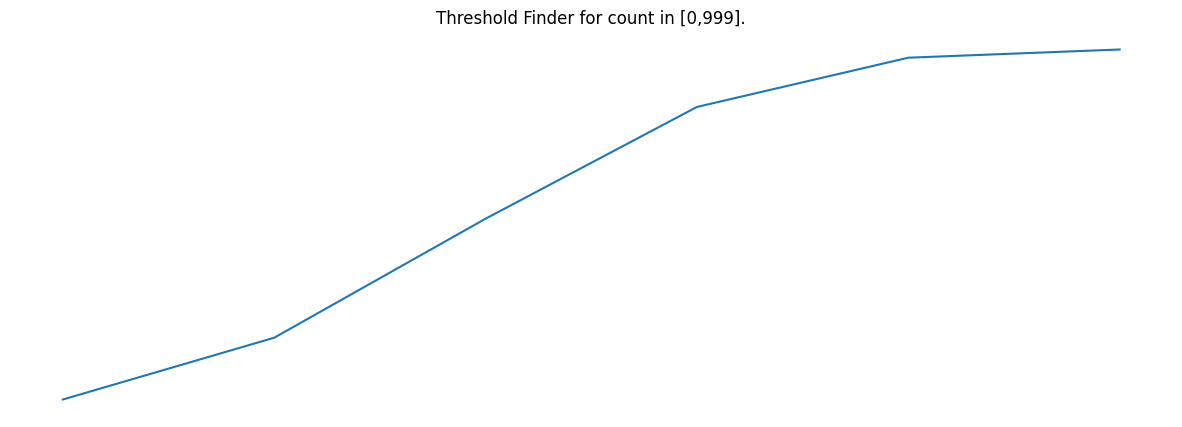

Best score is 0.5747524705352086 and best threshold is 0.9


  0%|          | 0/1713 [00:00<?, ?it/s]

Debug Mode. Only train on first 100 batches.


  0%|          | 0/1713 [00:00<?, ?it/s]

Debug Mode. Only train on first 100 batches.


  0%|          | 0/1713 [00:00<?, ?it/s]

Debug Mode. Only train on first 100 batches.


  0%|          | 0/1713 [00:00<?, ?it/s]

Debug Mode. Only train on first 100 batches.


  0%|          | 0/1713 [00:00<?, ?it/s]

Debug Mode. Only train on first 100 batches.
Now generating features for the validation set to simulate the submission.


  0%|          | 0/429 [00:00<?, ?it/s]

Finding Best Threshold in the given search space.


  0%|          | 0/6 [00:00<?, ?it/s]

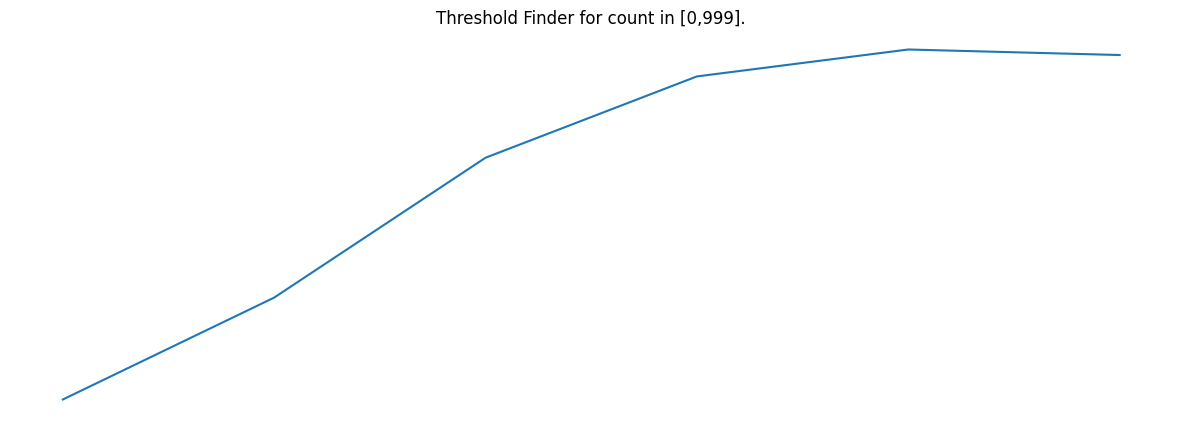

Best score is 0.6113546340406024 and best threshold is 0.8


In [ ]:
for epoch in range(n_epochs):
    scheduler.step()
    loss_train = train_func(train_loader)
    if epoch % valid_every == 0:
        print('Now generating features for the validation set to simulate the submission.')
        FEAS = generate_test_features(valid_loader)
        FEAS = torch.tensor(FEAS).cuda()
        print('Finding Best Threshold in the given search space.')
        find_threshold(df = df_valid_this,
               lower_count_thresh = 0,
               upper_count_thresh = 999,
               search_space = search_space)
        if epoch >= save_after:
            torch.save(model.state_dict(), f'{model_dir}{kernel_type}_fold{fold_id}_densenet_{image_size}_epoch{epoch}.pth')

In [ ]:
# path = '/Users/yankesswang/Downloads/shopee-product-matching/train_images/'

# fig, axs = plt.subplots(5,5, figsize =(15,15))
# axs = axs.ravel()
# train_img = train[:25]
# for i, row in enumerate(train_img.iterrows()):
#     img_path = os.path.join(path, row[1]['image'])
#     img = Image.open(img_path)
#     axs[i].imshow(img)
#     axs[i].axis('off')
# plt.show()

In [ ]:
# path = '/Users/yankesswang/Downloads/shopee-product-matching/train_images/'
# temp = train[train['label_group'] == 994676122][:5]

# fig, axs = plt.subplots(1, 5, figsize=(15, 15))  # Adjust grid size (4x5) based on how many images you want to display
# axs = axs.ravel()

# for i, row in enumerate(temp.iterrows()):
#     img_path = os.path.join(path, row[1]['image'])
#     img = Image.open(img_path)
#     axs[i].imshow(img)
#     axs[i].axis('off')

# plt.show()

# NLP 處理

In [ ]:
import random
import warnings
import time
import datetime
import ssl

# Basic packages for EDA.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Core packages for text processing.
import string
import re

# Libraries for text preprocessing using NLTK.
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Packages for text vectorization.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Packages for topic modeling.
from sklearn.decomposition import LatentDirichletAllocation, NMF

# sklearn packages for model evaluation.
from sklearn.metrics import f1_score, accuracy_score

# Packages for word clouds and NER.
from wordcloud import WordCloud, STOPWORDS
from collections import Counter, defaultdict
from PIL import Image
import spacy

# PyTorch and HuggingFace Transformers for deep learning.
import torch
from transformers import (BertTokenizer, BertForSequenceClassification, AdamW,
                          BertConfig, get_linear_schedule_with_warmup)
from torch.utils.data import TensorDataset, random_split, DataLoader, RandomSampler, SequentialSampler

# Keras packages for deep learning.
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from keras.initializers import Constant
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# For customizing our plots.
from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

# Setting some options for general use.
ssl._create_default_https_context = ssl._create_unverified_context
import nltk
from nltk.corpus import stopwords
import ssl

ssl._create_default_https_context = ssl._create_unverified_context
nltk.download('stopwords')
stop = set(stopwords.words('english'))
plt.style.use('fivethirtyeight')
sns.set(font_scale=1.5)
pd.options.display.max_columns = 250
pd.options.display.max_rows = 250
warnings.filterwarnings('ignore')

# Setting seeds for consistent results.
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)
from collections import Counter


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def clean_text(text):
    '''Clean text by performing a series of transformations:
        - Convert text to lowercase
        - Remove text inside square brackets
        - Remove URLs
        - Remove emojis
        - Remove HTML tags
        - Remove punctuations
        - Remove words containing numbers
    '''

    # Convert to lowercase
    text = str(text).lower()

    # Remove text inside square brackets
    text = re.sub('\[.*?\]', '', text)

    # Remove URLs
    text = re.sub('https?://\S+|www\.\S+', '', text)

    # Remove emojis
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # Remove HTML tags
    html = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    text = re.sub(html, '', text)

    # Remove punctuations
    table = str.maketrans('', '', string.punctuation)
    text = text.translate(table)

    # Remove words containing numbers
    text = re.sub('\w*\d\w*', '', text)

    return text

train['title_clean']= train['title'].apply(clean_text)

In [ ]:
train.head()

posting_id                                              image  \
0   train_129225211  /content/drive/My Drive/train_images/0000a6881...   
1  train_3386243561  /content/drive/My Drive/train_images/00039780d...   
2  train_2288590299  /content/drive/My Drive/train_images/000a190fd...   
3  train_2406599165  /content/drive/My Drive/train_images/00117e4fc...   
4  train_3369186413  /content/drive/My Drive/train_images/00136d1cf...   

        image_phash                                              title  \
0  94974f937d4c2433                          Paper Bag Victoria Secret   
1  af3f9460c2838f0f  Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...   
2  b94cb00ed3e50f78        Maling TTS Canned Pork Luncheon Meat 397 gr   
3  8514fc58eafea283  Daster Batik Lengan pendek - Motif Acak / Camp...   
4  a6f319f924ad708c                  Nescafe \xc3\x89clair Latte 220ml   

   label_group                                        title_clean  
0    249114794                          paper bag victoria secret  
1   2937985045  double tape  vhb  mm x  m original  double foa...  
2   2395904891           maling tts canned pork luncheon meat  gr  
3   4093212188  daster batik lengan pendek  motif acak  campur...  
4   3648931069                                    nescafe  latte

In [ ]:
stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words += more_stopwords
stemmer = nltk.SnowballStemmer("english")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

def preprocess_data(text):
    # 1. Tokenize the text
    tokens = word_tokenize(text)

    # 2. Convert to lowercase
    lower_tokens = [word.lower() for word in tokens]

    # 3. Remove stopwords
    stopwords_removed = [word for word in lower_tokens if word not in stop]

    # 4. Apply POS tagging
    pos_tags = nltk.pos_tag(stopwords_removed)

    # 5. Map POS tags to WordNet POS tags
    def get_wordnet_pos(tag):
        if tag.startswith('J'):
            return wordnet.ADJ
        elif tag.startswith('V'):
            return wordnet.VERB
        elif tag.startswith('N'):
            return wordnet.NOUN
        elif tag.startswith('R'):
            return wordnet.ADV
        else:
            return wordnet.NOUN

    wordnet_pos = [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in pos_tags]

    # 6. Lemmatize words based on their WordNet POS tags
    wnl = WordNetLemmatizer()
    lemmatized = [wnl.lemmatize(word, tag) for word, tag in wordnet_pos]

    # Remove any stopwords that might still exist after lemmatization
    lemmatized = [word for word in lemmatized if word not in stop]

    # 7. Return the cleaned and lemmatized string
    return ' '.join(lemmatized)

train['title_clean'] =train['title_clean'].apply(preprocess_data)
train.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


posting_id                                              image  \
0   train_129225211  /content/drive/My Drive/train_images/0000a6881...   
1  train_3386243561  /content/drive/My Drive/train_images/00039780d...   
2  train_2288590299  /content/drive/My Drive/train_images/000a190fd...   
3  train_2406599165  /content/drive/My Drive/train_images/00117e4fc...   
4  train_3369186413  /content/drive/My Drive/train_images/00136d1cf...   

        image_phash                                              title  \
0  94974f937d4c2433                          Paper Bag Victoria Secret   
1  af3f9460c2838f0f  Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...   
2  b94cb00ed3e50f78        Maling TTS Canned Pork Luncheon Meat 397 gr   
3  8514fc58eafea283  Daster Batik Lengan pendek - Motif Acak / Camp...   
4  a6f319f924ad708c                  Nescafe \xc3\x89clair Latte 220ml   

   label_group  fold                                        title_clean  
0    249114794     3                          paper bag victoria secret  
1   2937985045     3     double tape vhb mm x original double foam tape  
2   2395904891     4                    maling tt pork luncheon meat gr  
3   4093212188     3  daster batik lengan pendek motif acak campur l...  
4   3648931069     1                                      nescafe latte

In [ ]:
import plotly.express as px

def plot_distribution(x, title):

    fig = px.histogram(
    train,
    x = x,
    width = 600,
    height = 400,
    title = title
    )

    fig.show()


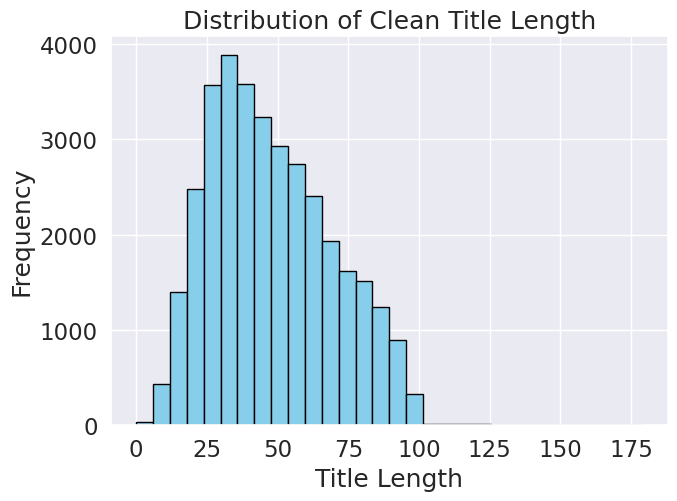

In [ ]:
train['clean_title_len'] = train['title_clean'].apply(lambda x: len(x))
plt.hist(train['clean_title_len'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.title('Distribution of Clean Title Length')
plt.show()

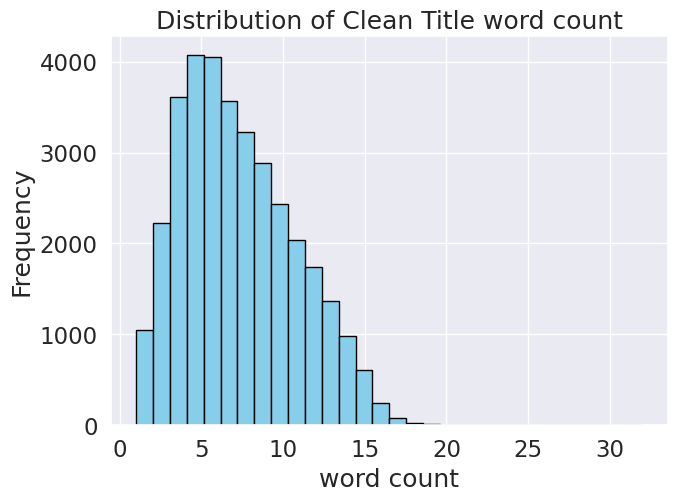

In [ ]:
#Character Count
#Word Count
train['clean_title_word_count'] = train["title_clean"].apply(lambda x: len(str(x).split(" ")))
plt.hist(train['clean_title_word_count'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('word count')
plt.ylabel('Frequency')
plt.title('Distribution of Clean Title word count')
plt.show()

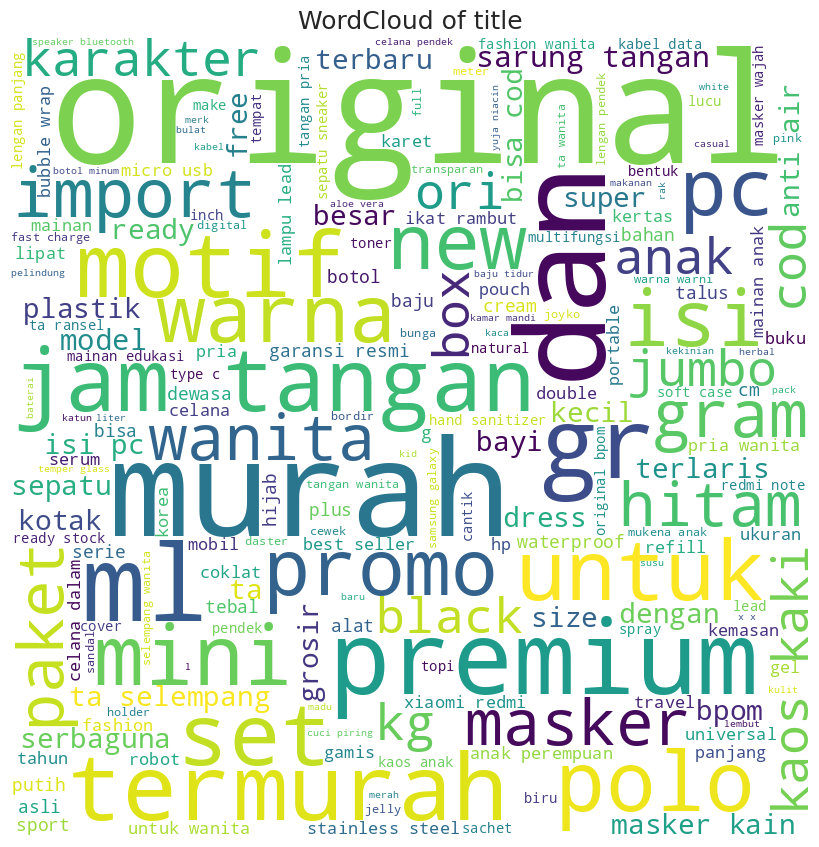

In [ ]:
wordcloud = WordCloud(width = 800,
                      height = 800,
                      background_color ='white',
                      min_font_size = 10
                      ,).generate(' '.join(train['title_clean']))

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('WordCloud of title')
plt.show()

# Most Common Words

In [ ]:
def plot_bt(x,w,p):
    common_words = x(train['title_clean'], 20)
    common_words_df = DataFrame (common_words,columns=['word','freq'])

    plt.figure(figsize=(16, 10))
    sns.barplot(x='freq', y='word', data=common_words_df,palette=p)
    plt.title("Top 20 "+ w , fontsize=16)
    plt.xlabel("Frequency", fontsize=14)
    plt.yticks(fontsize=13)
    plt.xticks(rotation=45, fontsize=13)
    plt.ylabel("");
    return common_words_df

In [ ]:
pip install CV

In [ ]:
word_freq = Counter(''.join(train['title_clean']).split())
top_words = word_freq.most_common(20)
word, counts = zip(*top_words)
word_dic = pd.DataFrame({'Words': word, 'Frequency': counts})

In [ ]:
word_dic.head()

Words  Frequency
0      anak       1738
1    wanita       1416
2       dan       1124
3     untuk       1058
4  original       1049

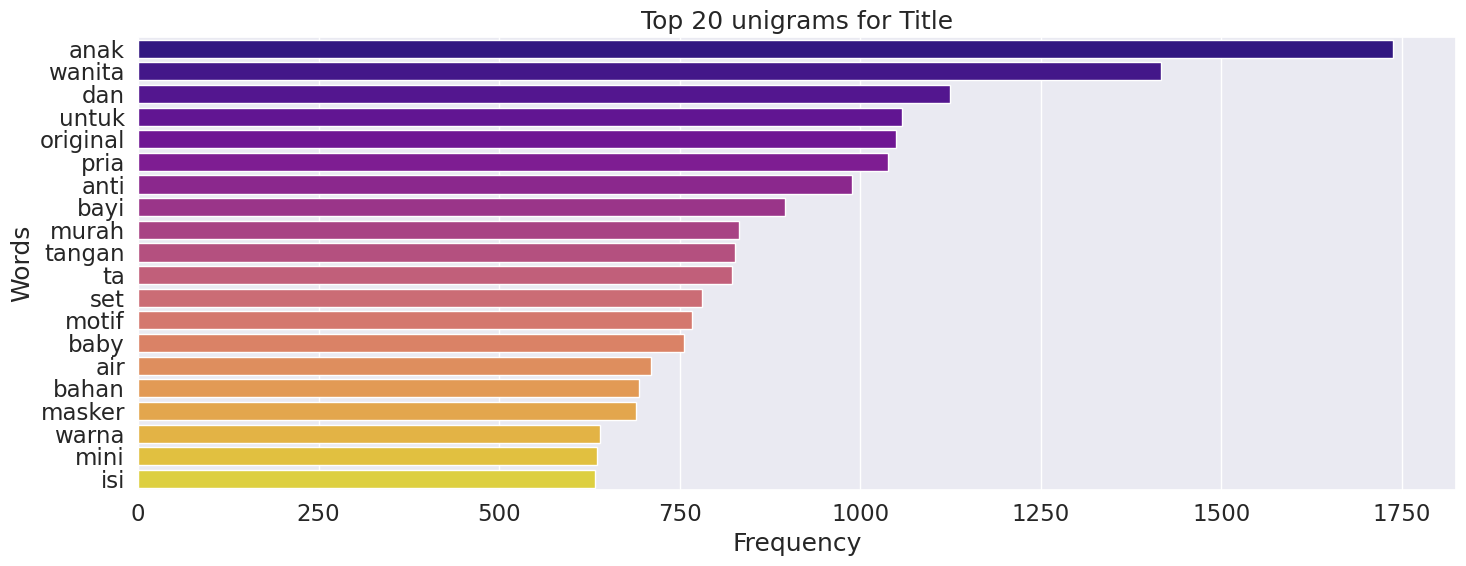

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x='Frequency', y='Words', data=word_dic, palette='plasma')
plt.title('Top 20 unigrams for Title')

plt.tight_layout()
plt.show()

In [ ]:
vec = CountVectorizer(stop_words='english', binary=True)
X = vec.fit_transform(train.title_clean).toarray()

In [ ]:
from sklearn.neighbors import NearestNeighbors

n = 50
knn = NearestNeighbors(n_neighbors=n)
knn.fit(X)
distances, indices = knn.kneighbors(X)

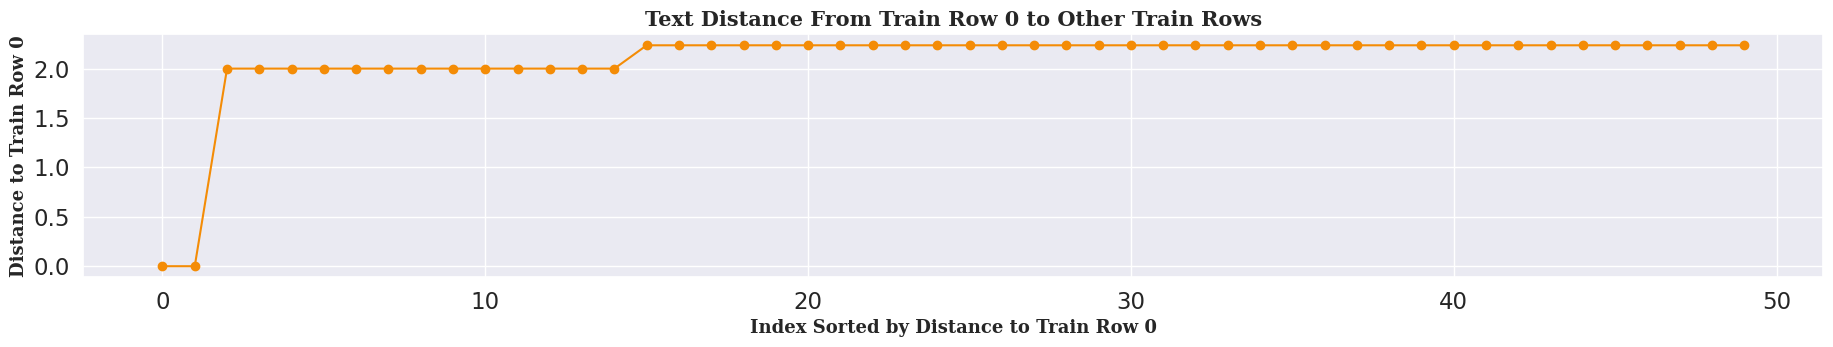

                     title_clean  label_group
33161  paper bag victoria secret    249114794
0      paper bag victoria secret    249114794
21902                               622201978
9219         paper bag body shop    471581622
11178                    cnk bag   4021627060
24571                  sling bag   1625419473
31007                              1840210388
34071               cosmetic bag   3433277712
16697                              1742550190
29438                               705692897


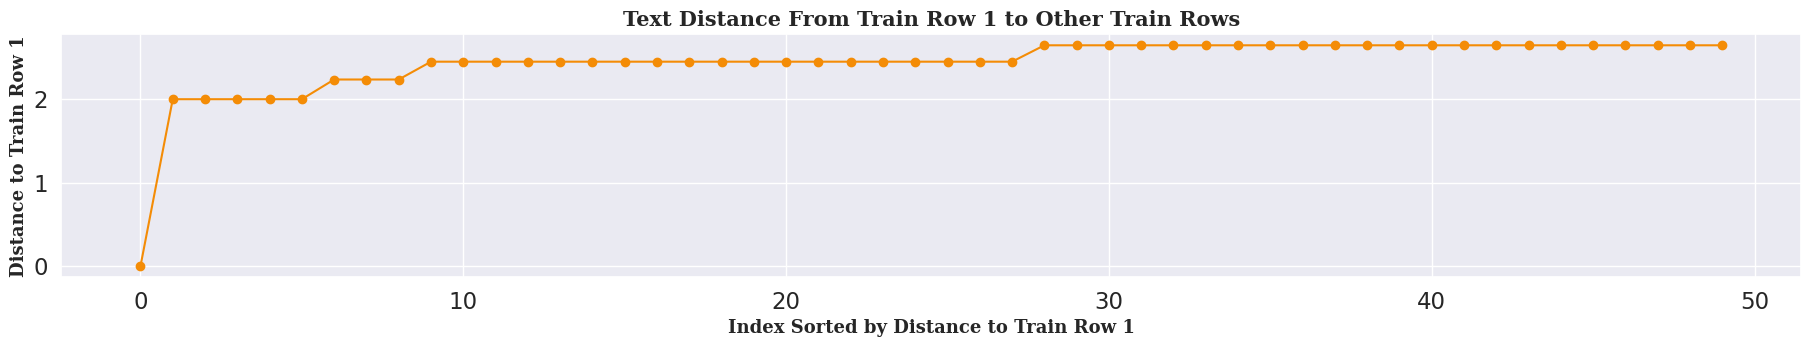

                                             title_clean  label_group
1         double tape vhb mm x original double foam tape   2937985045
18683            double tape vhb original x busa perekat   2937985045
21790           double tape busa pe foam tape x original    475342649
19262           double tape busa pe foam tape x original    475342649
23593  double tape vhb mm x tebal mm ori original mm ...   2819310070
10444           double tape busa pe foam tape x original    475342649
11683                                  double tape kenko   4148134568
4774              double tape pe foam tebal mm size mm x    475342649
23323                          double tape kenko mm inch   4148134568
1277                                      original emina   1033589203


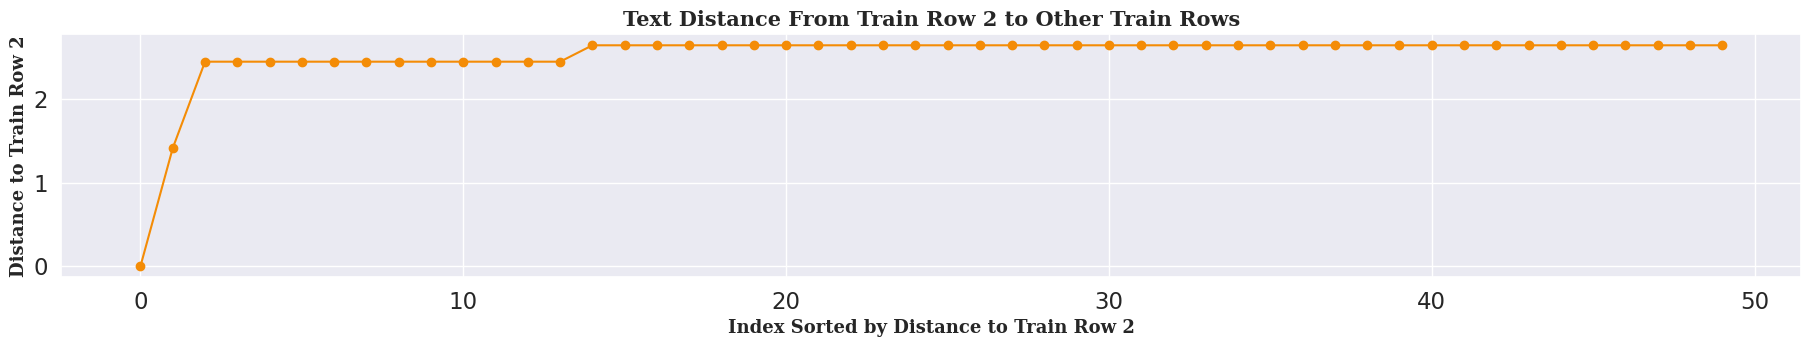

                            title_clean  label_group
2       maling tt pork luncheon meat gr   2395904891
15668  maling ham pork luncheon meat tt   2395904891
13145                                     4047365486
30880                                     3281617558
21075                         dancow gr   4266974527
10630                     diabetasol gr   1690663027
16697                                     1742550190
10313                          kraft gr   1296916779
7657                                      4047365486
21902                                      622201978


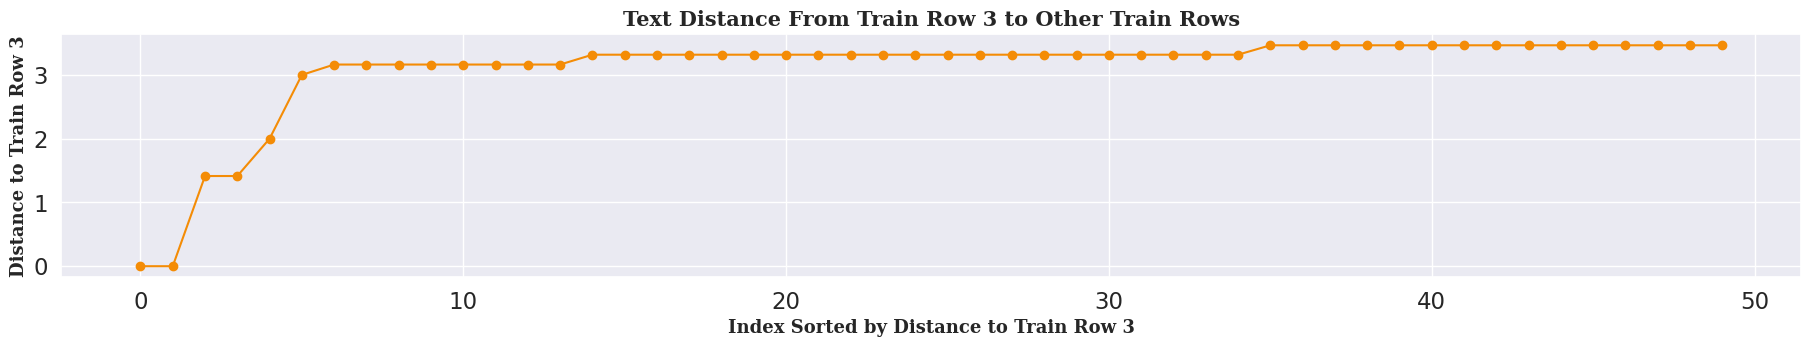

                                             title_clean  label_group
3      daster batik lengan pendek motif acak campur l...   4093212188
28878  daster batik lengan pendek motif acak campur l...   3150867956
32290  daster batik lengan pendek motif acak campur l...   2453599242
2522   daster batik lengan pendek motif acak campur l...    264184112
20105  daster batik bali lengan pendek motif acak cam...   3150867956
22183  daster payung bali jumbo xxl motif acak campur...   2560881468
761                      kemeja surf motif lengan pendek   2859794542
15780                    maskerslayerbandana motif batik   1714607112
27812  daster karakter leher kancing busui alhadi ter...   1773396944
8894   piyama hp lengan pendekcelana pendek motif kar...   3408803971


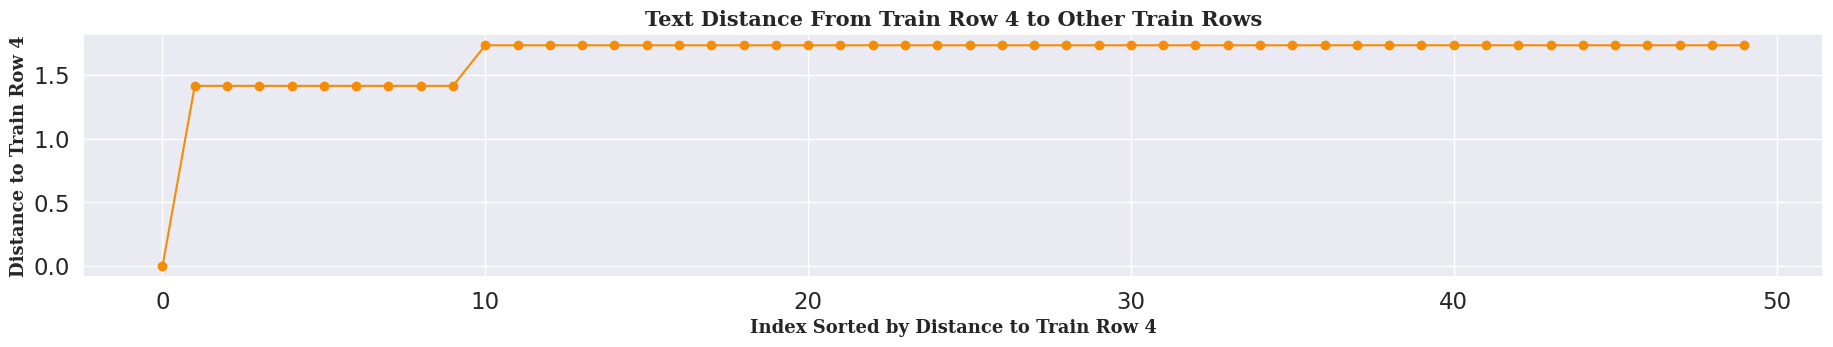

           title_clean  label_group
4        nescafe latte   3648931069
29438                     705692897
21902                     622201978
31007                    1840210388
13145                    4047365486
30880                    3281617558
252    nescafe classic   3030935442
16697                    1742550190
7657                     4047365486
18488                     656698835


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

for k in range(5):
    plt.figure(figsize=(20, 3))
    plt.plot(np.arange(50), distances[k], 'o-', color='#f48c06')
    plt.title('Text Distance From Train Row %i to Other Train Rows' % k, fontsize=15, fontweight='bold', horizontalalignment='center', fontfamily='serif')
    plt.ylabel('Distance to Train Row %i' % k, fontsize=13, fontweight='bold', fontfamily='serif')
    plt.xlabel('Index Sorted by Distance to Train Row %i' % k, fontsize=13, fontweight='bold', fontfamily='serif')
    plt.show()

    print(train.loc[indices[k, :10], ['title_clean', 'label_group']])


In [ ]:
from transformers import BertTokenizer
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, DistilBertModel
import torch

model_name='cahya/distilbert-base-indonesian'
tokenizer = DistilBertTokenizer.from_pretrained(model_name)
model = DistilBertModel.from_pretrained(model_name)


tokenizer_config.json:   0%|          | 0.00/62.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/230k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/273M [00:00<?, ?B/s]

In [ ]:
lbl_encoder = LabelEncoder()
train['label_code'] = lbl_encoder.fit_transform(train['label_group'])
NUM_CLASSES = train['label_code'].nunique()
NUM_CLASSES

11014

In [ ]:
train.head()

posting_id                                              image  \
0   train_129225211  /content/drive/My Drive/train_images/0000a6881...   
1  train_3386243561  /content/drive/My Drive/train_images/00039780d...   
2  train_2288590299  /content/drive/My Drive/train_images/000a190fd...   
3  train_2406599165  /content/drive/My Drive/train_images/00117e4fc...   
4  train_3369186413  /content/drive/My Drive/train_images/00136d1cf...   

        image_phash                                              title  \
0  94974f937d4c2433                          Paper Bag Victoria Secret   
1  af3f9460c2838f0f  Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...   
2  b94cb00ed3e50f78        Maling TTS Canned Pork Luncheon Meat 397 gr   
3  8514fc58eafea283  Daster Batik Lengan pendek - Motif Acak / Camp...   
4  a6f319f924ad708c                  Nescafe \xc3\x89clair Latte 220ml   

   label_group                                        title_clean  label_code  
0    249114794                          paper bag victoria secret         666  
1   2937985045     double tape vhb mm x original double foam tape        7572  
2   2395904891                    maling tt pork luncheon meat gr        6172  
3   4093212188  daster batik lengan pendek motif acak campur l...       10509  
4   3648931069                                      nescafe latte        9425

In [ ]:
def create_encodings(dataframe, tokenizer, max_length=None):
    texts = list(dataframe['title_clean'].apply(lambda o: str(o)).values)
    encodings = tokenizer(texts, padding=True, truncation=True, max_length=max_length)
    return encodings

def create_dataset(dataframe, tokenizer, max_length=None):
    encodings = create_encodings(dataframe, tokenizer, max_length=max_length)
    targets = dataframe['label_code'].values
    dataset = [{"input_ids": torch.tensor(encodings["input_ids"][i], dtype=torch.long),
                "attention_mask": torch.tensor(encodings["attention_mask"][i], dtype=torch.long),
                "labels": torch.tensor(targets[i], dtype=torch.long)}
               for i in range(len(dataframe))]
    return dataset

sampled_train = train.sample(1000)
dataset = create_dataset(sampled_train, tokenizer, max_length=30)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, num_workers=4, shuffle=True)

batch = next(iter(dataloader))
print(batch['input_ids'].shape, batch['labels'].shape)

torch.Size([64, 30]) torch.Size([64])


In [ ]:
import math

class ArcMarginProduct(nn.Module):
    r"""Implement of large margin arc distance: :
        Args:
            in_features: size of each input sample
            out_features: size of each output sample
            s: norm of input feature
            m: margin
            cos(theta + m)
        """
    def __init__(self, in_features, out_features, s=30.0, m=0.50, easy_margin=False):
        super(ArcMarginProduct, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.s = s
        self.m = m
        self.weight = nn.Parameter(torch.FloatTensor(out_features, in_features))
        nn.init.xavier_uniform_(self.weight)

        self.easy_margin = easy_margin
        self.cos_m = math.cos(m)
        self.sin_m = math.sin(m)
        self.th = math.cos(math.pi - m)
        self.mm = math.sin(math.pi - m) * m

    def forward(self, input, label):
        # --------------------------- cos(theta) & phi(theta) ---------------------------
        cosine = F.linear(F.normalize(input), F.normalize(self.weight))
        sine = torch.sqrt((1.0 - torch.pow(cosine, 2)).clamp(0, 1))
        phi = cosine * self.cos_m - sine * self.sin_m
        if self.easy_margin:
            phi = torch.where(cosine > 0, phi, cosine)
        else:
            phi = torch.where(cosine > self.th, phi, cosine - self.mm)
        # --------------------------- convert label to one-hot ---------------------------
        # one_hot = torch.zeros(cosine.size(), requires_grad=True, device='cuda')
        one_hot = torch.zeros(cosine.size(), device=device)
        one_hot.scatter_(1, label.view(-1, 1).long(), 1)
        # -------------torch.where(out_i = {x_i if condition_i else y_i) -------------
        output = (one_hot * phi) + ((1.0 - one_hot) * cosine)  # you can use torch.where if your torch.__version__ is 0.4
        output *= self.s
        # print(output)

        return output

In [ ]:
class ArcFaceClassifier(nn.Module):
    def __init__(self, emb_size, output_classes):
        super().__init__()
        self.W = nn.Parameter(torch.Tensor(emb_size, output_classes))
        nn.init.kaiming_uniform_(self.W)
    def forward(self, x):
        # Step 1:
        x_norm = F.normalize(x)
        W_norm = F.normalize(self.W, dim=0)
        # Step 2:
        return x_norm @ W_norm

def arcface_loss(cosine, targ, m=.4):
    # this prevents nan when a value slightly crosses 1.0 due to numerical error
    cosine = cosine.clip(-1+1e-7, 1-1e-7)
    # Step 3:
    arcosine = cosine.arccos()
    # Step 4:
    arcosine += F.one_hot(targ, num_classes = output_classes) * m
    # Step 5:
    cosine2 = arcosine.cos()
    # Step 6:
    return F.cross_entropy(cosine2, targ)

In [ ]:
class shopee_llm_Model(nn.Module):
    def __init__(self, bert_model, num_classes=NUM_CLASSES, last_hidden_size=768):
        super().__init__()
        self.bert_model = bert_model
        self.arc_margin = ArcMarginProduct(last_hidden_size,
                                           num_classes,
                                           s=30.0,
                                           m=0.50,
                                           easy_margin=False)

    def get_bert_features(self, input_ids, attention_mask):
        output = self.bert_model(input_ids=input_ids, attention_mask=attention_mask)
        last_hidden_state = output.last_hidden_state
        CLS_token_state = last_hidden_state[:, 0, :]
        return CLS_token_state

    def forward(self, input_ids, attention_mask, labels):
        CLS_hidden_state = self.get_bert_features(input_ids, attention_mask)
        output = self.arc_margin(CLS_hidden_state, labels)
        return output


In [ ]:
class AvgMeter:
    def __init__(self, name="Metric"):
        self.name = name
        self.reset()

    def reset(self):
        self.avg, self.sum, self.count = [0]*3

    def update(self, val, count=1):
        self.count += count
        self.sum += val * count
        self.avg = self.sum / self.count

    def __repr__(self):
        text = f"{self.name}: {self.avg:.4f}"
        return text

In [ ]:
def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group["lr"]

def get_accuracy(preds, targets):
    """
    preds shape: (batch_size, num_labels)
    targets shape: (batch_size)
    """
    preds = preds.argmax(dim=1)
    acc = (preds == targets).float().mean()
    return acc

In [ ]:
train_df, valid_df = train_test_split(train,
                                      test_size=0.33,
                                      shuffle=True,
                                      random_state=42,
                                      stratify=train['label_code'])

train_dataset = create_dataset(train_df, tokenizer, max_length=30)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, num_workers=4, shuffle=True)

valid_dataset = create_dataset(valid_df, tokenizer, max_length=30)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=64, num_workers=4, shuffle=False)


In [ ]:
patience = 2
factor = 0.8
dropout = 0.5
learning_rate = 1e-5

bert_model = shopee_llm_Model(model)
bert_model = bert_model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(bert_model.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=factor, patience=patience)


In [ ]:
best_loss = float('inf')
import copy
from tqdm import tqdm

best_loss = float('inf')
best_model_wts = copy.deepcopy(model.state_dict())
epochs = 30

for epoch in range(epochs):
    bert_model.train()
    total_loss = 0.0
    total_corrects = 0

    for batch in tqdm(train_loader):
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = bert_model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        outputs = outputs.to(device)
        optimizer.zero_grad()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        total_loss += loss.item() * input_ids.size(0)
        total_corrects += torch.sum(preds == labels)

    epoch_loss = total_loss / len(train_loader.dataset)
    epoch_acc = total_corrects.double() / len(train_loader.dataset)

    print(f'Epoch {epoch+1}/{epochs} - Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

    # Evaluation on validation set
    model.eval()
    total_loss = 0.0
    total_corrects = 0

    with torch.no_grad():
        for batch in valid_loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)
            outputs = bert_model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            outputs = outputs.to(device)
            loss = criterion(outputs,labels)

            _, preds = torch.max(outputs, 1)
            total_loss += loss.item() * input_ids.size(0)
            total_corrects += torch.sum(preds == labels)

        epoch_loss = total_loss / len(valid_loader.dataset)
        epoch_acc = total_corrects.double() / len(valid_loader.dataset)

        print(f'Epoch {epoch+1}/{epochs} - Validation Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

        if epoch_loss < best_loss:
            best_loss = epoch_loss
            best_model_wts = copy.deepcopy(model.state_dict())

    scheduler.step(epoch_loss)

100%|██████████| 359/359 [01:01<00:00,  5.87it/s]

Epoch 1/30 - Train Loss: 24.0284 Acc: 0.0000


Epoch 1/30 - Validation Loss: 23.4773 Acc: 0.0000


100%|██████████| 359/359 [00:58<00:00,  6.15it/s]

Epoch 2/30 - Train Loss: 22.8607 Acc: 0.0000


Epoch 2/30 - Validation Loss: 22.5326 Acc: 0.0000


100%|██████████| 359/359 [01:03<00:00,  5.68it/s]

Epoch 3/30 - Train Loss: 21.8124 Acc: 0.0003


Epoch 3/30 - Validation Loss: 21.7293 Acc: 0.0043


100%|██████████| 359/359 [01:03<00:00,  5.61it/s]

Epoch 4/30 - Train Loss: 20.9071 Acc: 0.0036


Epoch 4/30 - Validation Loss: 21.0634 Acc: 0.0084


100%|██████████| 359/359 [01:02<00:00,  5.73it/s]

Epoch 5/30 - Train Loss: 20.1118 Acc: 0.0075


Epoch 5/30 - Validation Loss: 20.4904 Acc: 0.0131


100%|██████████| 359/359 [01:02<00:00,  5.75it/s]

Epoch 6/30 - Train Loss: 19.4057 Acc: 0.0118


Epoch 6/30 - Validation Loss: 19.9810 Acc: 0.0169


100%|██████████| 359/359 [01:03<00:00,  5.69it/s]

Epoch 7/30 - Train Loss: 18.7509 Acc: 0.0167


Epoch 7/30 - Validation Loss: 19.5294 Acc: 0.0219


100%|██████████| 359/359 [01:03<00:00,  5.70it/s]

Epoch 8/30 - Train Loss: 18.1496 Acc: 0.0206


Epoch 8/30 - Validation Loss: 19.1141 Acc: 0.0290


100%|██████████| 359/359 [01:02<00:00,  5.78it/s]

Epoch 9/30 - Train Loss: 17.5816 Acc: 0.0254


Epoch 9/30 - Validation Loss: 18.7284 Acc: 0.0343


100%|██████████| 359/359 [01:02<00:00,  5.77it/s]

Epoch 10/30 - Train Loss: 17.0400 Acc: 0.0308


Epoch 10/30 - Validation Loss: 18.3738 Acc: 0.0386


100%|██████████| 359/359 [01:04<00:00,  5.59it/s]

Epoch 11/30 - Train Loss: 16.5388 Acc: 0.0378


Epoch 11/30 - Validation Loss: 18.0474 Acc: 0.0433


100%|██████████| 359/359 [01:02<00:00,  5.71it/s]

Epoch 12/30 - Train Loss: 16.0430 Acc: 0.0424


Epoch 12/30 - Validation Loss: 17.7361 Acc: 0.0476


100%|██████████| 359/359 [01:04<00:00,  5.59it/s]

Epoch 13/30 - Train Loss: 15.5777 Acc: 0.0481


Epoch 13/30 - Validation Loss: 17.4438 Acc: 0.0526


100%|██████████| 359/359 [01:02<00:00,  5.73it/s]

Epoch 14/30 - Train Loss: 15.1381 Acc: 0.0528


Epoch 14/30 - Validation Loss: 17.1670 Acc: 0.0573


100%|██████████| 359/359 [01:02<00:00,  5.72it/s]

Epoch 15/30 - Train Loss: 14.6964 Acc: 0.0590


Epoch 15/30 - Validation Loss: 16.9005 Acc: 0.0622


100%|██████████| 359/359 [01:02<00:00,  5.74it/s]

Epoch 16/30 - Train Loss: 14.2772 Acc: 0.0657


Epoch 16/30 - Validation Loss: 16.6478 Acc: 0.0681


100%|██████████| 359/359 [01:02<00:00,  5.76it/s]

Epoch 17/30 - Train Loss: 13.8784 Acc: 0.0708


Epoch 17/30 - Validation Loss: 16.4106 Acc: 0.0727


100%|██████████| 359/359 [01:02<00:00,  5.78it/s]

Epoch 18/30 - Train Loss: 13.4833 Acc: 0.0772


Epoch 18/30 - Validation Loss: 16.1873 Acc: 0.0780


100%|██████████| 359/359 [01:02<00:00,  5.77it/s]

Epoch 19/30 - Train Loss: 13.1077 Acc: 0.0842


Epoch 19/30 - Validation Loss: 15.9648 Acc: 0.0840


100%|██████████| 359/359 [01:02<00:00,  5.76it/s]

Epoch 20/30 - Train Loss: 12.7331 Acc: 0.0933


Epoch 20/30 - Validation Loss: 15.7566 Acc: 0.0894


100%|██████████| 359/359 [01:02<00:00,  5.78it/s]

Epoch 21/30 - Train Loss: 12.3700 Acc: 0.1014


Epoch 21/30 - Validation Loss: 15.5566 Acc: 0.0940


100%|██████████| 359/359 [01:02<00:00,  5.76it/s]

Epoch 22/30 - Train Loss: 12.0189 Acc: 0.1079


Epoch 22/30 - Validation Loss: 15.3668 Acc: 0.0995


100%|██████████| 359/359 [01:02<00:00,  5.76it/s]

Epoch 23/30 - Train Loss: 11.6682 Acc: 0.1190


Epoch 23/30 - Validation Loss: 15.1841 Acc: 0.1042


100%|██████████| 359/359 [01:02<00:00,  5.76it/s]

Epoch 24/30 - Train Loss: 11.3300 Acc: 0.1272


Epoch 24/30 - Validation Loss: 15.0121 Acc: 0.1094


100%|██████████| 359/359 [01:02<00:00,  5.78it/s]

Epoch 25/30 - Train Loss: 11.0094 Acc: 0.1354


Epoch 25/30 - Validation Loss: 14.8412 Acc: 0.1143


100%|██████████| 359/359 [01:02<00:00,  5.78it/s]

Epoch 26/30 - Train Loss: 10.6888 Acc: 0.1449


Epoch 26/30 - Validation Loss: 14.6724 Acc: 0.1201


100%|██████████| 359/359 [01:02<00:00,  5.77it/s]

Epoch 27/30 - Train Loss: 10.3788 Acc: 0.1535


Epoch 27/30 - Validation Loss: 14.5077 Acc: 0.1250


100%|██████████| 359/359 [01:02<00:00,  5.76it/s]

Epoch 28/30 - Train Loss: 10.0701 Acc: 0.1611


Epoch 28/30 - Validation Loss: 14.3646 Acc: 0.1298


100%|██████████| 359/359 [01:02<00:00,  5.76it/s]

Epoch 29/30 - Train Loss: 9.7747 Acc: 0.1708


Epoch 29/30 - Validation Loss: 14.2182 Acc: 0.1358


100%|██████████| 359/359 [01:02<00:00,  5.77it/s]

Epoch 30/30 - Train Loss: 9.4822 Acc: 0.1828


Epoch 30/30 - Validation Loss: 14.0797 Acc: 0.1405


In [ ]:
import cupy

In [ ]:
import torch
import cupy

def get_text_predictions(model, df,max_length=128):
    model.eval()
    tokenized = df['title_clean'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True, truncation=True, max_length=max_length))

    text_embeddings = []
    for text in tokenized:
        input_ids = torch.tensor([text]).to(device)
        attention_mask = torch.ones_like(input_ids).to(device)  # Assuming no padding tokens
        with torch.no_grad():
            embeddings = model.get_bert_features(input_ids, attention_mask)
        text_embeddings.append(embeddings.cpu().numpy())

    text_embeddings = torch.tensor(text_embeddings).squeeze(1).numpy()

    preds = []
    CHUNK = 1024 * 4

    print('Finding similar titles...')
    CTS = len(df) // CHUNK
    if len(df) % CHUNK != 0:
        CTS += 1

    for j in range(CTS):
        a = j * CHUNK
        b = (j + 1) * CHUNK
        b = min(b, len(df))
        print('chunk', a, 'to', b)

        cts = cupy.matmul(text_embeddings, text_embeddings[a:b].T).T

        for k in range(b - a):
            IDX = cupy.where(cts[k,] > 0.75)[0]
            o = df.iloc[cupy.asnumpy(IDX)].posting_id.values
            preds.append(o)

    return preds

# Usage:
# Replace 'your_dataframe_here' with the DataFrame you want to process
# Replace 'shopee_llm_model' with an instance of your shopee_llm_Model
# Replace 'tokenizer' with your tokenizer object
# Replace 'device' with the device you're using (e.g., "cuda" or "cpu")
# Replace 'title_clean' with the column containing the text data
# text_predictions = get_text_predictions(shopee_llm_model, your_dataframe_here, tokenizer, device)


In [ ]:
text_predictions = get_text_predictions(bert_model, train)

Finding similar titles...
chunk 0 to 4096


TypeError: ignored

In [ ]:
test = pd.read_csv('/content/drive/My Drive/test_shopee.csv')

In [ ]:
# test.head()
test['title_clean'] = test['title'].apply(clean_text).apply(preprocess_data)

In [ ]:
# 1. 將模型設置為評估模式
model.eval()

# 2. 創建一個 DataLoader


test['title_clean'] = test['title'].apply(clean_text).apply(preprocess_data)
encodings = create_encodings(test, tokenizer, max_length=30)
test_dataset = [{"input_ids": torch.tensor(encodings["input_ids"][i], dtype=torch.long),
                    "attention_mask": torch.tensor(encodings["attention_mask"][i], dtype=torch.long)}
                   for i in range(len(test))]

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# 3. 運行模型進行預測
all_predictions = []

with torch.no_grad():
    for batch in tqdm(test_loader):
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs[0]
        _, preds = torch.max(logits, 1)  # 取得最大概率的類別為預測結果
        # all_predictions += preds.cpu().tolist()

        # print(preds)
        all_predictions += preds
# all_predictions
(len(all_predictions[0]))
# 4. 解碼預測（如果需要的話）
# flat_predictions = [item for sublist in all_predictions for item in sublist]
# predicted_labels = np.argmax(flat_predictions, axis=1).flatten()
# predicted_labels
# decoded_predictions = lbl_encoder.inverse_transform(all_predictions)

100%|██████████| 1/1 [00:00<00:00, 34.06it/s]


768

In [ ]:
decoded_predictions = []

# Loop over each tensor and decode
for tensor in all_predictions:
    # print(tensor)
    max_prob_index = torch.argmax(tensor).item()
    tmp = []

    # print(tensor_np)
    decoded_value = lbl_encoder.inverse_transform([max_prob_index])
    # print(decoded_batch)
    # tmp.extend(decoded_batch)
    decoded_predictions.append(decoded_value[0])
    print('=======')
decoded_predictions

[29855676, 15519389, 30796165]